<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/6_desafio_correlacao_regressao/desafio_correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Correlação e Regressão

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Dado

| Variável | Descrição |
|:---------|:----------|
| id       | Identificador único do veículo |
| make     | Marca do carro (ex: Ford, Toyota) |
| model    | Modelo do carro |
| year     | Ano de fabricação |
| price    | Preço de venda do carro |
| mileage  | Quilometragem (km rodados) |
| engine_size | Tamanho do motor (em litros) |
| fuel_type| Tipo de combustível (gasolina, diesel, elétrico) |
| transmission | Tipo de transmissão (manual, automática) |
| doors    | Número de portas |
| color    | Cor do carro |
| tax      | Taxa anual de imposto veicular |
| mpg      | Milhas por Galão(indicador de eficiência de combustível) |
| sold_date | Data de venda do veículo |

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Correlação & Regressão/desafio_carros_usados.csv')
df.head()

,id,make,model,year,price,mileage,engine_size,fuel_type,transmission,doors,color,tax,mpg,sold_date
0,1,Volkswagen,Model B,2022,23859,94811,3.6,Diesel,Manual,2,Grey,288,39.2,2023-10-11
1,2,Chevrolet,Model A,2008,16953,128028,4.9,Diesel,Manual,5,Red,339,15.3,2021-04-22
2,3,BMW,Model B,2006,12332,49178,4.1,Diesel,Automatic,4,Red,458,37.2,2020-05-04
3,4,Chevrolet,Model B,2018,18475,42821,2.7,Hybrid,Manual,5,Silver,486,43.7,2021-06-20
4,5,Chevrolet,Model C,2017,12129,192799,2.8,Gasoline,Manual,4,Silver,295,19.1,2021-12-06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   make          1000 non-null   object 
 2   model         1000 non-null   object 
 3   year          1000 non-null   int64  
 4   price         1000 non-null   int64  
 5   mileage       1000 non-null   int64  
 6   engine_size   1000 non-null   float64
 7   fuel_type     1000 non-null   object 
 8   transmission  1000 non-null   object 
 9   doors         1000 non-null   int64  
 10  color         1000 non-null   object 
 11  tax           1000 non-null   int64  
 12  mpg           1000 non-null   float64
 13  sold_date     1000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 109.5+ KB


In [4]:
df[['id', 'year']] = df[['id', 'year']].astype(str)
df.dtypes

,0
id,object
make,object
model,object
year,object
price,int64
mileage,int64
engine_size,float64
fuel_type,object
transmission,object
doors,int64


In [5]:
df.describe()

,price,mileage,engine_size,doors,tax,mpg
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,20524.900000,106665.076000,2.978400,3.549000,294.58000,29.980800
std,7241.830627,55414.820244,1.151494,1.100368,114.83892,11.721802
min,3000.000000,10203.000000,1.000000,2.000000,100.00000,10.100000
25%,15836.250000,57933.500000,2.000000,3.000000,188.00000,20.300000
50%,20622.500000,105654.000000,3.000000,4.000000,295.50000,29.600000
75%,25378.250000,157543.250000,4.000000,5.000000,392.25000,40.400000
max,42823.000000,199651.000000,5.000000,5.000000,499.00000,50.000000


## Tarefas

### 1.
Análise de Correlação

● Calcule a correlação entre as variáveis numéricas e o preço do carro (price).

● Quais variáveis estão mais correlacionadas com o preço?

● Quais estão menos correlacionadas?

In [6]:
correlacoes = df.corr(numeric_only=True)
correlacoes_price = correlacoes['price'].sort_values(ascending=False)
correlacoes_price

,price
price,1.000000
doors,0.033304
mileage,0.011115
tax,0.009043
engine_size,-0.000181
mpg,-0.008201


<font color='blue'>
A variável mais correlacionada é **doors** (0.033). E a menos correlacionada é **engine_size** (-0.0001).
</font>

### 2.
Análise das 5 variáveis mais correlacionadas com preço

● Plote **histograma** e **boxplot** de cada variável

● Plote o **scatterplot** com price no eixo y e a variável no eixo x.

● Faça uma regressão linear simples utilizando cada variável como preditora (X) e o preço como resposta (y). Interprete os coeficientes e o R².



🔎 Analisando variável: DOORS


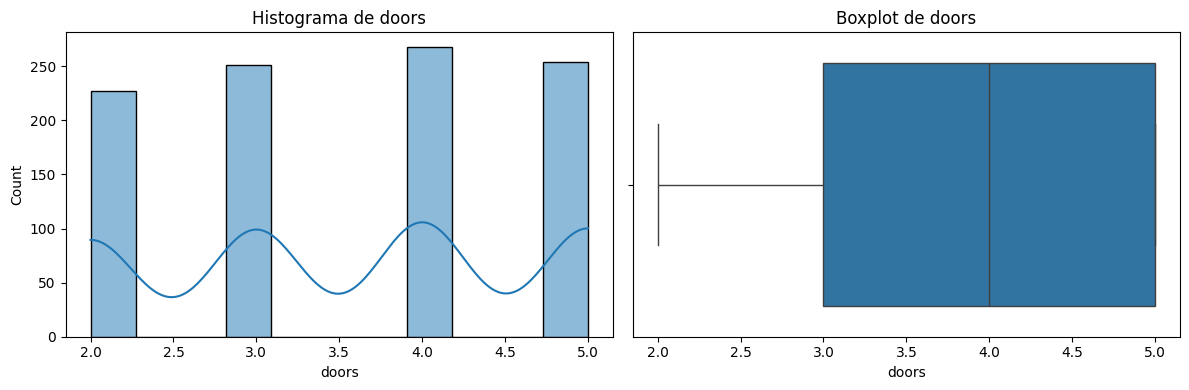

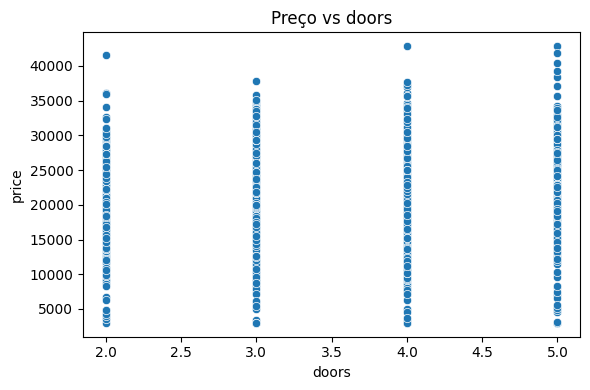

📈 Regressão Linear: price = 219.18 * doors + 19747.03
R² = 0.0011


🔎 Analisando variável: MILEAGE


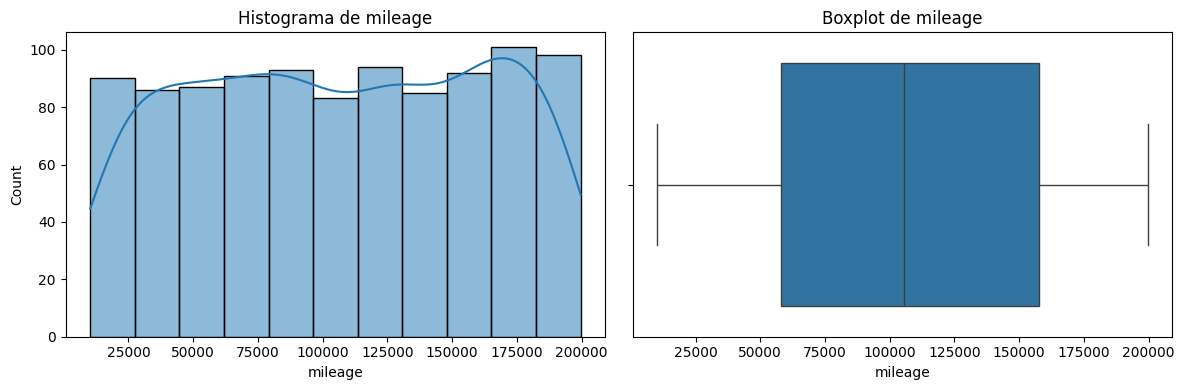

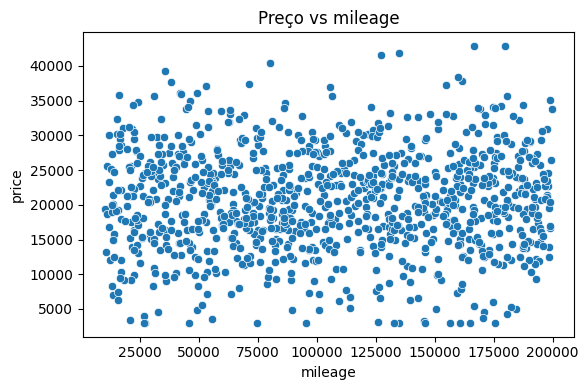

📈 Regressão Linear: price = 0.00 * mileage + 20369.96
R² = 0.0001


🔎 Analisando variável: TAX


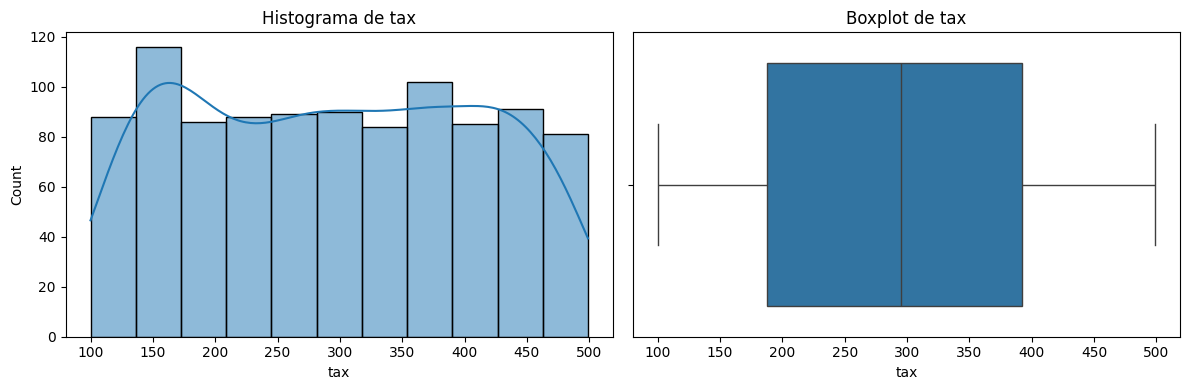

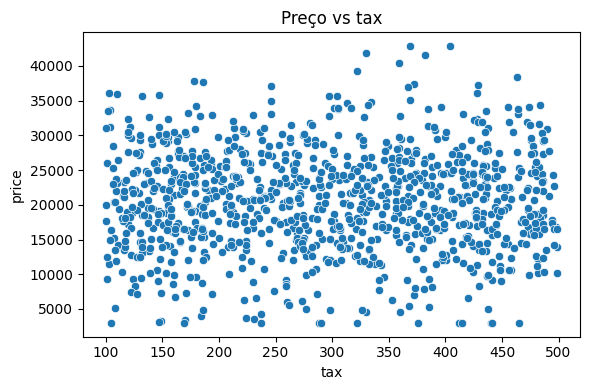

📈 Regressão Linear: price = 0.57 * tax + 20356.92
R² = 0.0001


🔎 Analisando variável: ENGINE_SIZE


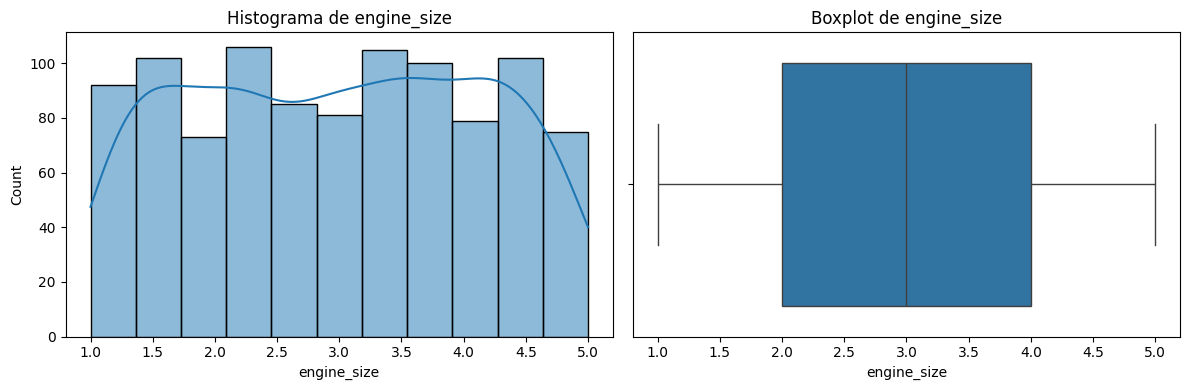

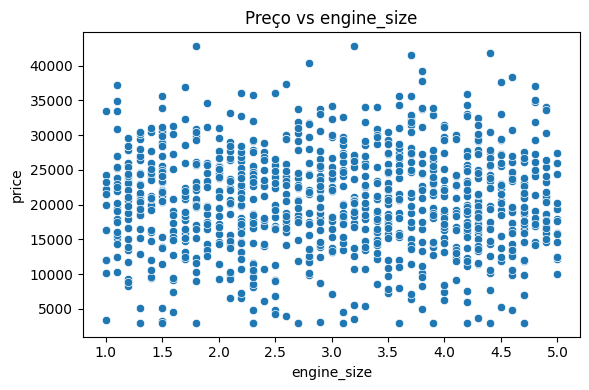

📈 Regressão Linear: price = -1.14 * engine_size + 20528.30
R² = 0.0000


🔎 Analisando variável: MPG


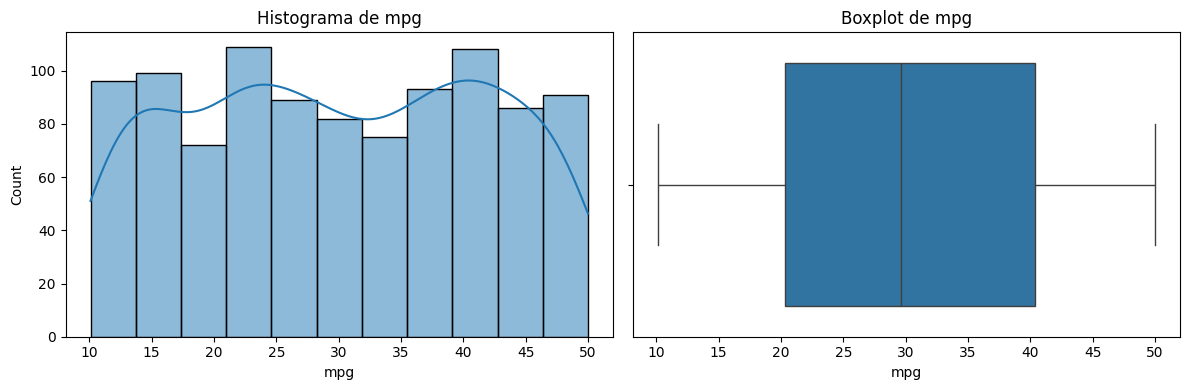

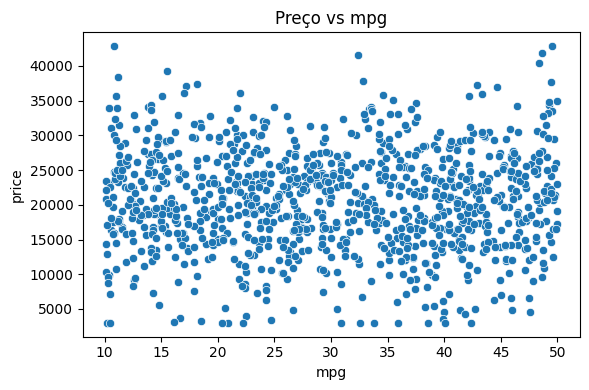

📈 Regressão Linear: price = -5.07 * mpg + 20676.80
R² = 0.0001


In [7]:
variaveis = ['doors', 'mileage', 'tax', 'engine_size', 'mpg']

# Loop para cada variável
for var in variaveis:
    print(f"\n\n🔎 Analisando variável: {var.upper()}")

    # 1. Histogramas e Boxplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[var], kde=True, ax=axs[0])
    axs[0].set_title(f'Histograma de {var}')
    sns.boxplot(x=df[var], ax=axs[1])
    axs[1].set_title(f'Boxplot de {var}')
    plt.tight_layout()
    plt.show()

    # 2. Scatterplot com price
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df['price'])
    plt.title(f'Preço vs {var}')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.tight_layout()
    plt.show()

    # 3. Regressão linear simples
    X = df[[var]].dropna()
    y = df.loc[X.index, 'price']  # Garante alinhamento dos dados
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_

    print(f"📈 Regressão Linear: price = {coef:.2f} * {var} + {intercept:.2f}")
    print(f"R² = {r2:.4f}")

<font color=blue>
R²: indica o quanto da variação em **price** é explicada pela variável preditora.
<br>
- Todas as variáveis analisadas (doors, mileage, tax, engine_size, mpg) não explicam a variação de price.
</font>